In [1]:
# set env variables
import os
import pandas as pd
import numpy as np
import mlflow
from dotenv import find_dotenv, load_dotenv
import shap
import mlflow.sklearn
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier


#Import the credentials to register in MLflow
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

True

In [2]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [3]:
import pycaret
pycaret.__version__

'2.3.10'

In [4]:
data = pd.read_csv("C:/Users/willi/Python/Spotify_Project/Data/final_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      1900 non-null   int64  
 1   genres          1900 non-null   int64  
 2   sub-genres      1900 non-null   int64  
 3   explicit        1900 non-null   int64  
 4   followers       1900 non-null   int64  
 5   danceability    1900 non-null   float64
 6   energy          1900 non-null   float64
 7   key             1900 non-null   int64  
 8   loudness        1900 non-null   float64
 9   mode            1900 non-null   int64  
 10  tempo           1900 non-null   float64
 11  duration_ms     1900 non-null   int64  
 12  time_signature  1900 non-null   int64  
 13  mood            1900 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 207.9 KB


In [5]:
X = data.drop('mood', axis=1)
y = data['mood']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# initialize setup
from pycaret.classification import *
s = setup(data, target = 'mood', session_id = 123, 
          numeric_features = ['popularity', 'followers', 'danceability', 'energy', 'loudness', 'tempo','duration_ms'],
          categorical_features = ['genres', 'sub-genres', 'explicit','key','mode','time_signature'] ,
          experiment_name = 'mood1')

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.2.2. Support for newer scikit-learn versions will be added in a future release.

In [ ]:
best_model = compare_models()

In [ ]:
print(best_model)

In [ ]:
plot_model(best_model, plot = 'auc')

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
plot_model(best_model, plot = 'boundary')

In [ ]:
plot_model(best_model, plot = 'feature')

In [ ]:
# save pipeline
save_model(best_model, 'outputs\model')

In [9]:
MLFLOW_TRACKING_URI = os.getenv("MLFLOW_TRACKING_URI")
MLFLOW_TRACKING_USERNAME = os.getenv("MLFLOW_TRACKING_USERNAME")
MLFLOW_TRACKING_PASSWORD = os.getenv("MLFLOW_TRACKING_PASSWORD")

mlflow.set_tracking_uri("https://dagshub.com/inouyewilliam/Master-Thesis.mlflow")

logged_model = 'runs:/5154466b36f54418a25059dcb5a943be/model'
    
loaded_model = mlflow.sklearn.load_model(logged_model)



final_model = loaded_model.best_estimator_['model']
final_model

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
loaded_model.best_estimator_[2]

In [10]:
model = RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=84)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=84)

In [11]:
explainer = shap.TreeExplainer(model)

explainer

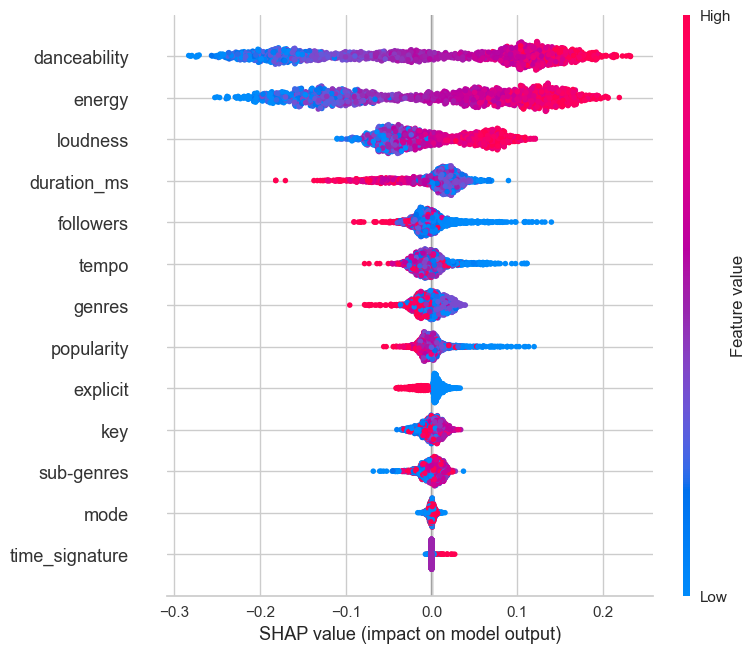

In [38]:
shap.initjs()
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[1], X)

In [39]:
shap_values[1].shape

(1900, 13)

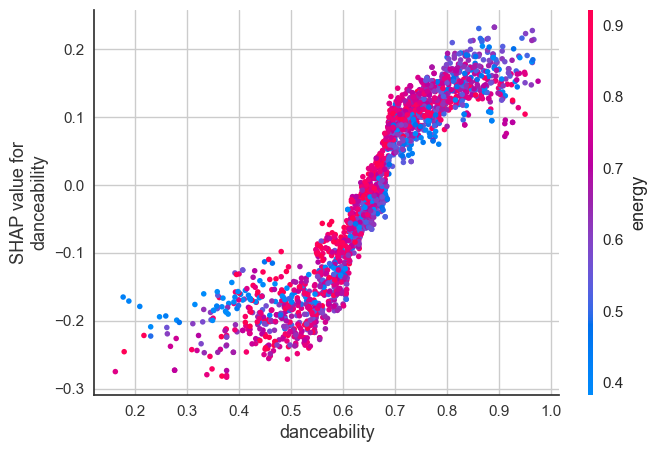

In [46]:
shap.dependence_plot("danceability",shap_values[1],X,interaction_index= "energy")

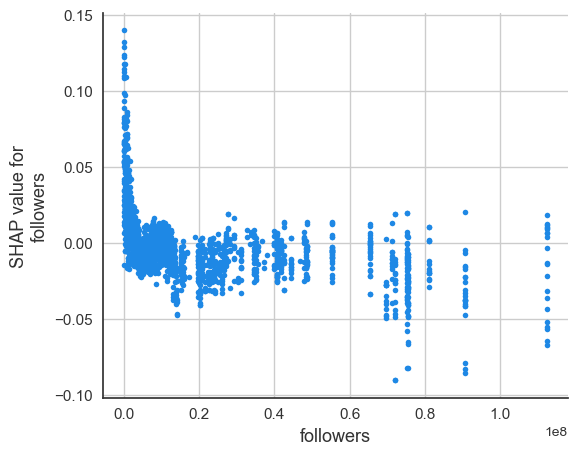

In [47]:
shap.dependence_plot("followers",shap_values[1],X,interaction_index= None)

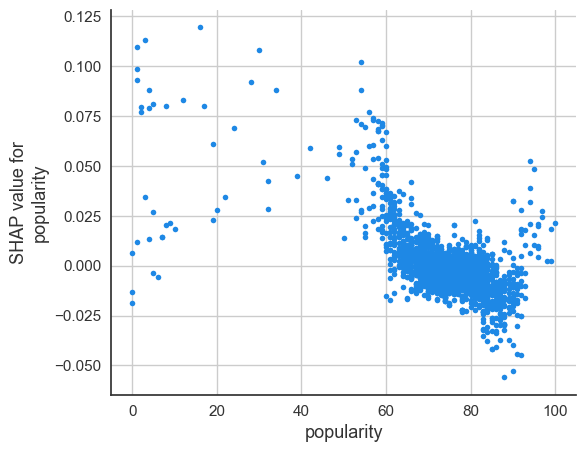

In [40]:
shap.dependence_plot("popularity",shap_values[1],X,interaction_index= None)

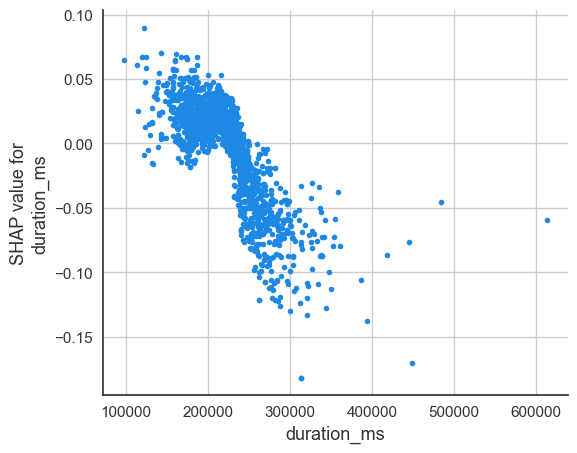

In [41]:
shap.dependence_plot("duration_ms",shap_values[1],X,interaction_index= None)

In [13]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:1000,:])

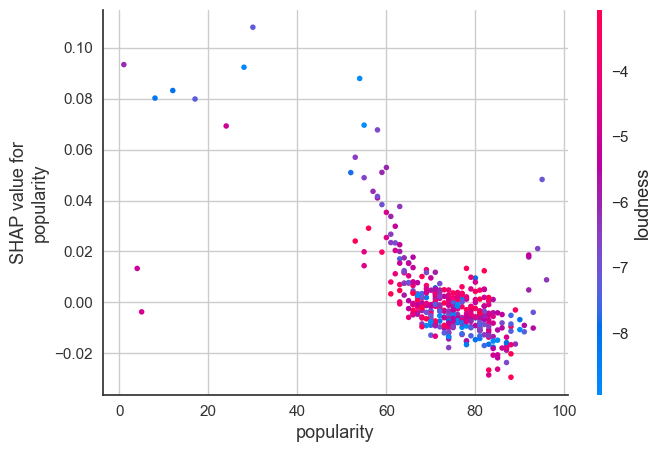

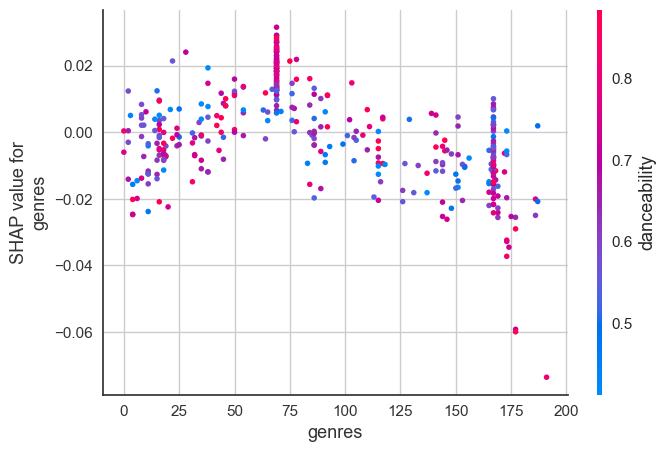

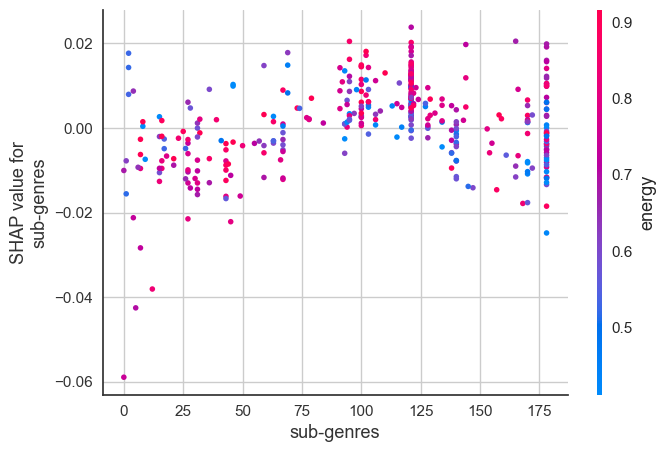

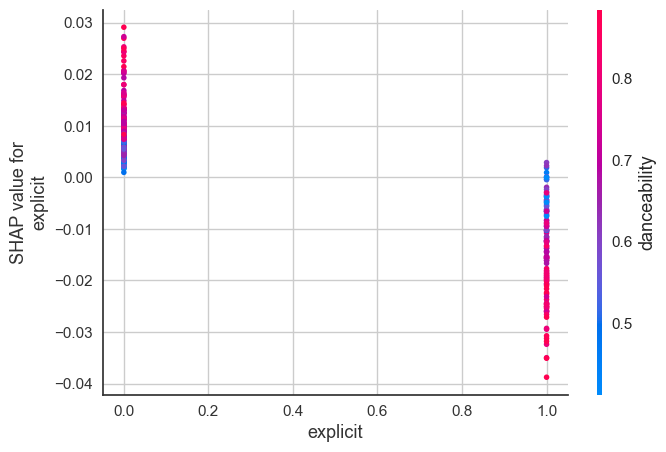

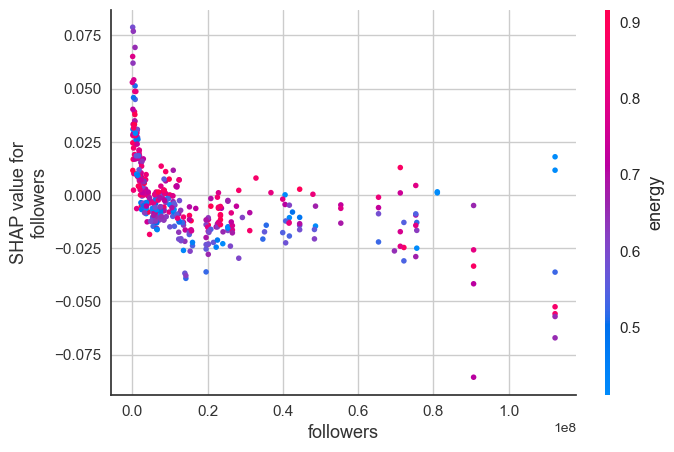

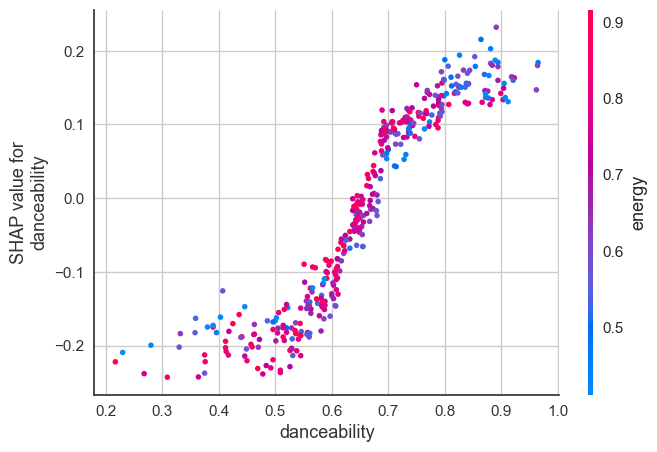

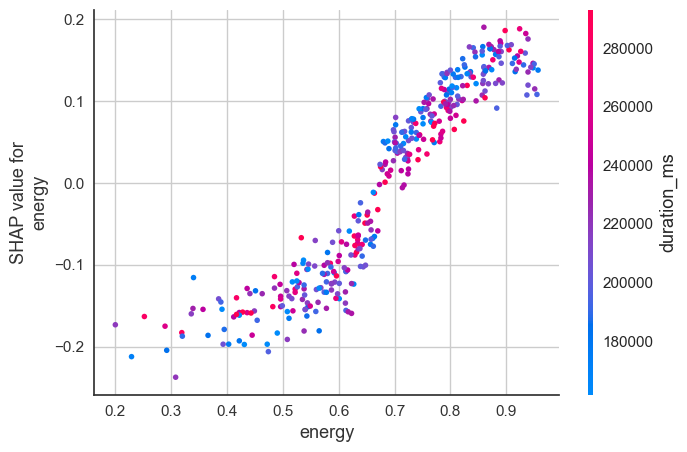

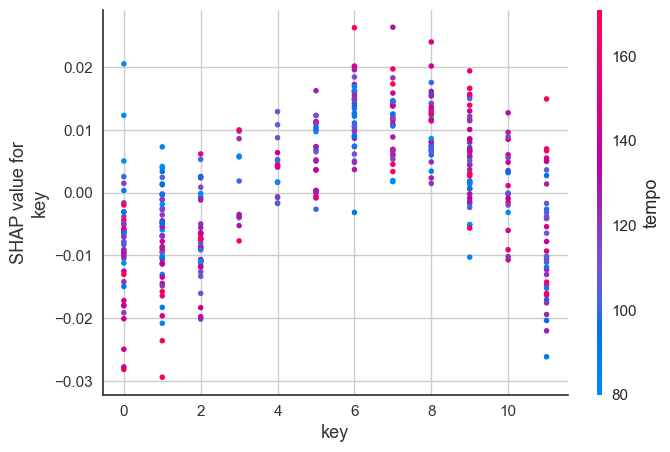

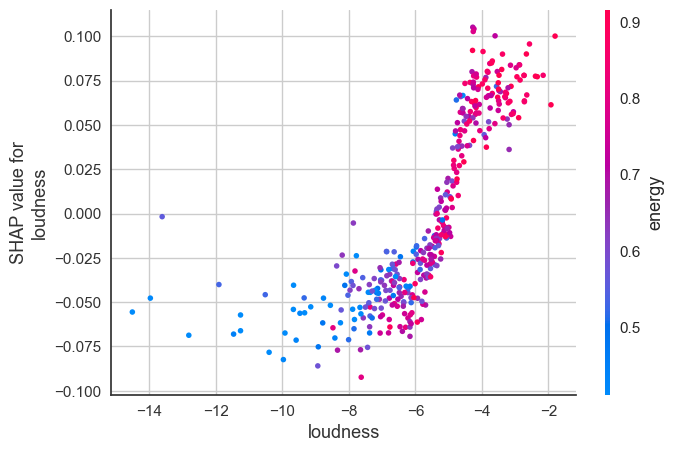

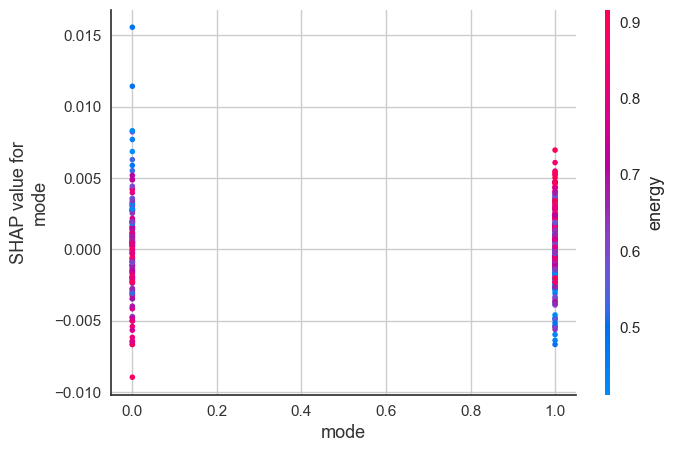

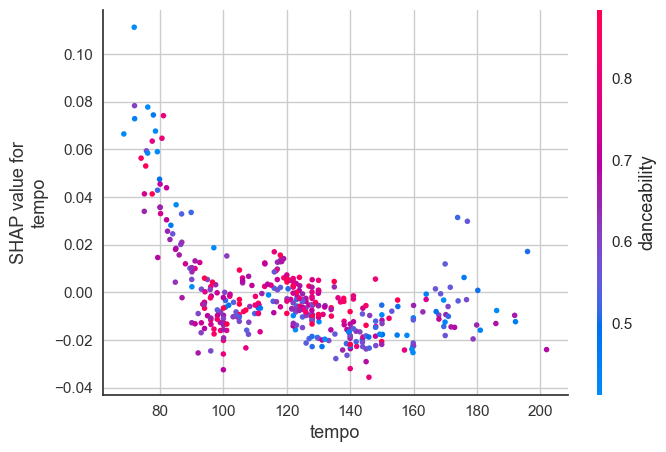

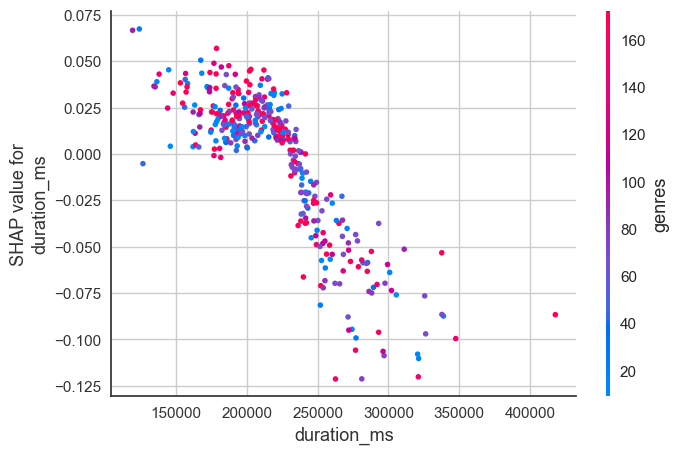

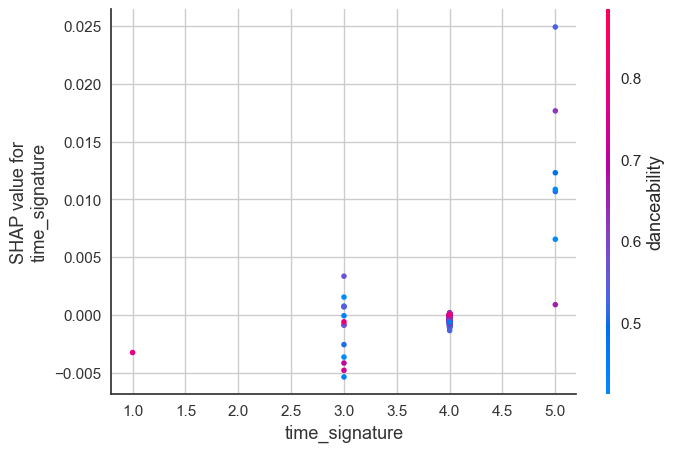

In [14]:
for name in X_test.columns:
    shap.dependence_plot(name, shap_values[1], X_test, display_features=X_test)